<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Keras_2Feature_Input_linearRegression_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Two features/Input
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.style.use('dark_background')

<Axes: ylabel='Count'>

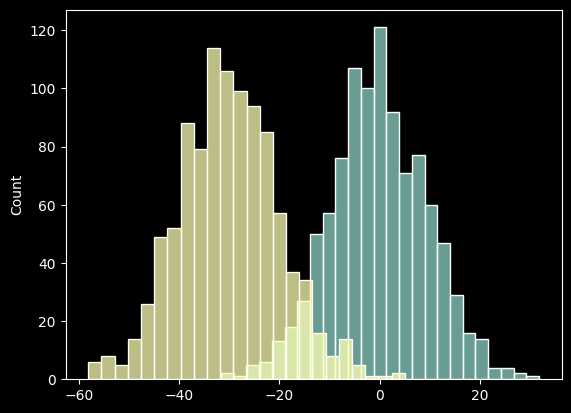

In [3]:
v = np.random.normal(0, 10, 1000)
w = np.random.normal(-30, 10, 1000)
sns.histplot(v)
sns.histplot(w)

In [4]:
# build a two features dataset using a random equation z = 19v**2 - 31w + 77

z = np.add(np.multiply(19, np.square(v)) - np.multiply(31,w),
           77)

df = pd.DataFrame({'v':v, 'w':w, 'z':z})
df.sample(3)


,v,w,z
228,-0.605061,-33.340241,1117.503350
901,-2.382194,-38.146756,1367.371550
369,-3.524886,-26.353370,1130.026045


<Figure size 2200x600 with 0 Axes>

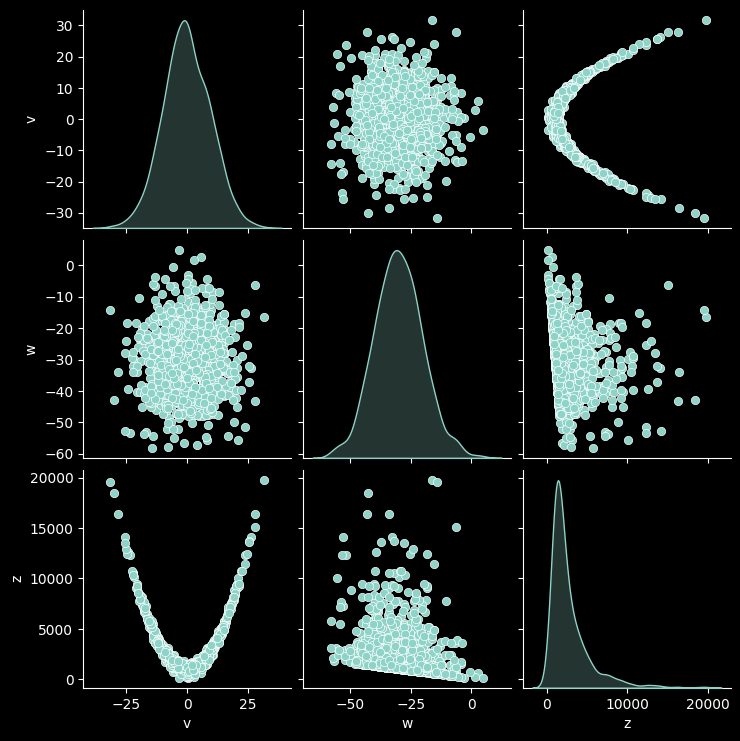

In [5]:
#check the relationship using pairplot
plt.figure(figsize=(22,6))
sns.pairplot(df, diag_kind='kde')
plt.show()

In [6]:
# define X and y
X = df.drop('z', axis=1)
y = df['z']

#normalize the input data using standard scaler
ss = StandardScaler()
X = ss.fit_transform(X)

X[:2]

#train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

# Modelling using SKlearn

In [7]:
# instantiate the model
linreg = LinearRegression()

#fit and transform
linreg.fit(X_train, y_train)

#predict
y_pred = linreg.predict(X_test)

print(mean_squared_error(y_test, y_pred))
mean_absolute_error(y_test, y_pred)


4306447.936756206


1617.1098270917034

In [8]:
# For the equation z = 19v**2 - 31w + 77, what is the predicted coefficients and intercept
print(linreg.intercept_)
print(linreg.coef_)

2818.3279951290156
[   9.53219252 -373.58410961]


# Modelling using Keras-Tensorflow

In [9]:
# define X and y
X = df.drop('z', axis=1)
y = df['z']

#normalize the input data using standard scaler
ss = StandardScaler()
X = ss.fit_transform(X)

X[:2]

#train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

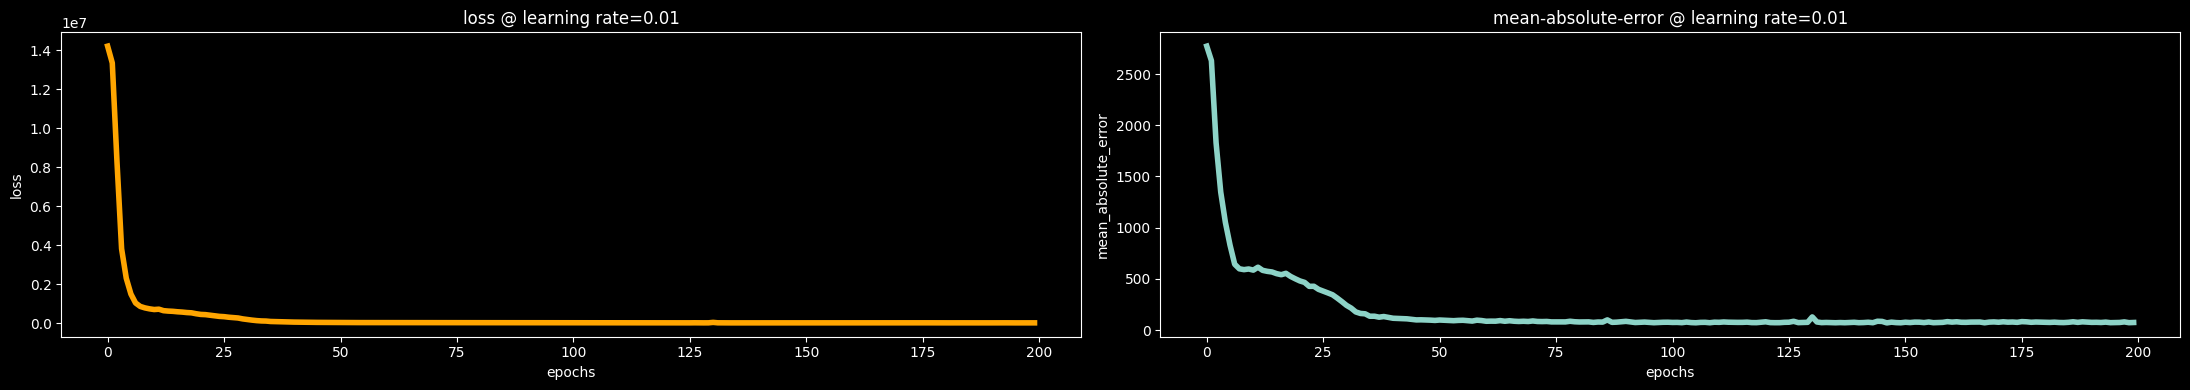

In [10]:
# model instantiate, add layers and define activation functions
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, tf.keras.activations.relu, input_dim=2))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.swish))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.swish))
model.add(tf.keras.layers.Dense(1, tf.keras.activations.swish))


#Compile = check for error, optimize, and get accuracy report
model.compile(
    loss = tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=tf.keras.metrics.mae
)

# fit the model
history = model.fit(X, y, epochs=200, verbose=0)

#create a dataframe from loss and mse and plot them
hist = pd.DataFrame(history.history)
hist['epochs'] = history.epoch
hist.set_index('epochs', inplace=True)

plt.figure(figsize=(22,4))

plt.subplot(1,2,1)
sns.lineplot( x=hist.index, y=hist['loss'], color='orange', linewidth=4)
plt.title('loss @ learning rate=0.01')
plt.subplot(1,2,2)
sns.lineplot(x = hist.index, y=hist['mean_absolute_error'], linewidth=4)
plt.title('mean-absolute-error @ learning rate=0.01')

plt.tight_layout()
plt.show()

In [11]:
print(model.evaluate(X_test, y_test, verbose=0))
print(y_test[:10])
model.predict(X_test, verbose=0).reshape(-1,)[:10]

[10526.6865234375, 80.385986328125]
521    1085.677387
737     791.840183
740    5819.024571
660    2639.021198
411    1319.558999
678    5317.384756
626    2180.504180
513    6059.333231
859    2335.524461
136    8003.430635
Name: z, dtype: float64


array([1206.6029 ,  760.55493, 5604.3364 , 2603.219  , 1443.4568 ,
       5417.014  , 2083.8384 , 5946.0703 , 2334.7048 , 7863.529  ],
      dtype=float32)

In [85]:
#print the model archetecture
for i in range(len(model.layers)):
  print(f'layer {i} shape: {model.layers[i].get_weights()[0].shape}, \
  with {model.layers[i].get_weights()[0].shape[0]*model.layers[i].get_weights()[0].shape[1] + model.layers[i].get_weights()[0].shape[1]} parameters (\
  {model.layers[i].get_weights()[0].shape[0]*model.layers[i].get_weights()[0].shape[1]} weights and\
  {model.layers[i].get_weights()[0].shape[1]} biases)')

layer 0 shape: (2, 8),   with 24 parameters (  16 weights and  8 biases)
layer 1 shape: (8, 16),   with 144 parameters (  128 weights and  16 biases)
layer 2 shape: (16, 16),   with 272 parameters (  256 weights and  16 biases)
layer 3 shape: (16, 1),   with 17 parameters (  16 weights and  1 biases)


In [88]:
# or use summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 457 (1.79 KB)
Trainable params: 457 (1.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


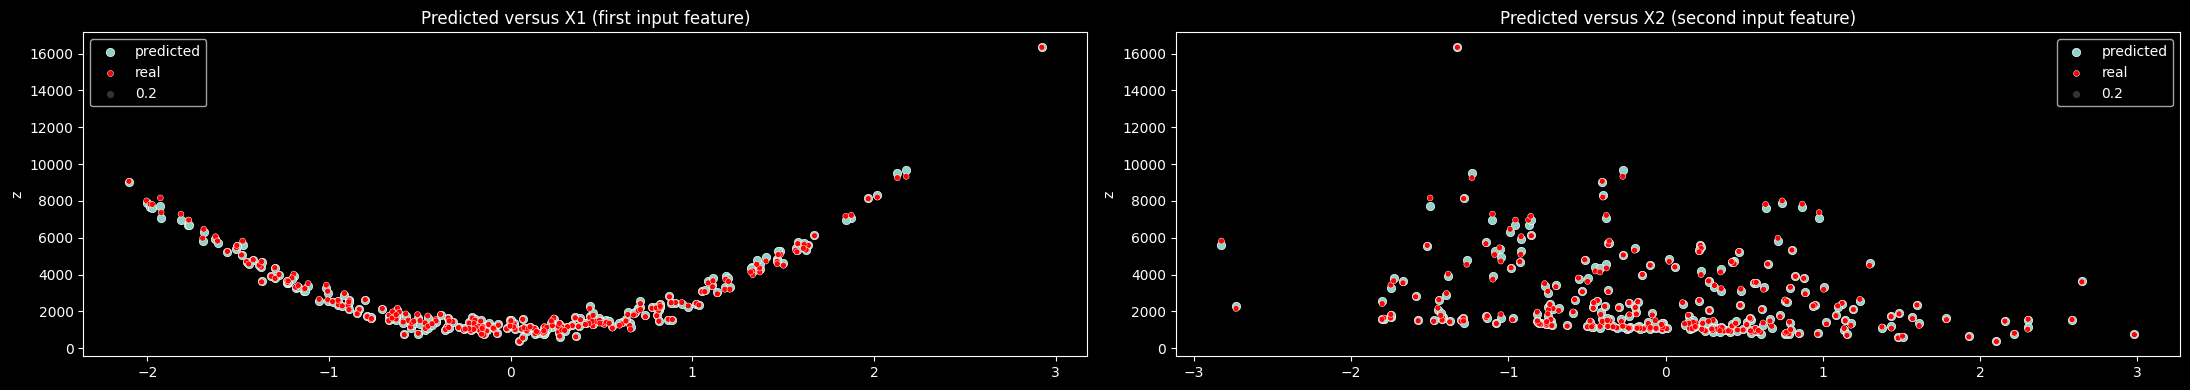

In [130]:
# check the prediction
y_pred = model.predict(X_test, verbose=0)
plt.figure(figsize=(22,4))
plt.subplot(1,2,1)
plt.title('Predicted versus X1 (first input feature)')
sns.scatterplot(x=X_test[:,0], y=y_pred.reshape(-1,), label='predicted')
sns.scatterplot(x=X_test[:,0], y=y_test, color='red', label='real', size=0.2)
plt.subplot(1,2,2)
sns.scatterplot(x=X_test[:,1], y=y_pred.reshape(-1,), label='predicted')
sns.scatterplot(x=X_test[:,1], y=y_test, color='red', label='real', size=0.2)
plt.title('Predicted versus X2 (second input feature)')
plt.tight_layout()
plt.show()